# Analysis

### 1. Loading the project

In [49]:
# basic imports from brightway
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi
from bw2io.importers import SingleOutputEcospold2Importer
import bw2analyzer as bwa
from bw2data import methods

# other relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [61]:
# define a project where we install the databases and work in this script
bd.projects.set_current('brightway25')

### 2. Database overview

In [62]:
bd.databases

Databases dictionary with 3 object(s):
	bw25_db
	ecoinvent-3.10-biosphere
	ecoinvent310clca

In [63]:
bd.projects.current

'brightway25'

In [64]:
ei_clca = bd.Database('ecoinvent310clca')
ei_bio = bd.Database('ecoinvent-3.10-biosphere')
ceramics_db = bd.Database('bw25_db')

### 3. Database exploration

In [65]:
ceramics_db.search('ceramics')

['ceramics production' (kilogram, GLO, None)]

In [67]:
# define a process as object in the project
ceramics = ceramics_db.get(name = 'ceramics production', location = "GLO", unit = 'kilogram')


### 4. Impact assessment methods

In [59]:
lcia_gwp100 = ('EF v3.1', 'climate change', 'global warming potential (GWP100)')
lcia_water = ('EF v3.1','water use','user deprivation potential (deprivation-weighted water consumption)')
lcia_land = ('EF v3.1', 'land use', 'soil quality index')

### 4. LCI 

In [69]:
# export the LCI to e
bi.export.excel.write_lci_excel(ceramics_db.name,
                                objs=[ceramics],
                                dirpath=Path.cwd())

'c:\\Users\\TimWeber\\repos_20LCA\\brightway25\\lci-bw25_db.xlsx'

### 5. LCIA

In [70]:
# Quick LCIA calculation
smartphone_lca = ceramics.lca(lcia_gwp100)
smartphone_lca.score


c:\Users\TimWeber\anaconda3\envs\brightway25\Lib\site-packages\bw2calc\lca_base.py:87: UserWarning: No valid biosphere flows found. No inventory results can be calculated, `lcia` will raise an error
  warnings.warn(


EmptyBiosphere: 

### 6. Contribution analysis

In [41]:
# One option to do a contribution analysis is to use the recursive calculation method
bwa.print_recursive_calculation(ceramics,
lcia_method=lcia_gwp100,max_level=3,cutoff=0.05)

c:\Users\TimWeber\anaconda3\envs\brightway25\Lib\site-packages\bw2calc\lca_base.py:87: UserWarning: No valid biosphere flows found. No inventory results can be calculated, `lcia` will raise an error
  warnings.warn(


EmptyBiosphere: 

In [27]:
# Another option is to use the recursive calculation to an object, which returns a DataFrame
smartphone_ca_gwp = bwa.utils.recursive_calculation_to_object(smartphone,
                                          lcia_method=lcia_gwp100,
                                          max_level=1,
                                          cutoff=0.02,
                                          as_dataframe=True,
                                          )
smartphone_ca_gwp

,label,parent,score,fraction,amount,name,key
0,root,None,37.618364,1.000000,1.000000,"consumer electronics production, mobile device...","(ecoinvent-3.10-consequential, 81b1261c4390ecc..."
1,root_a,root,0.833467,0.022156,0.038600,"market for battery, Li-ion, NCA, rechargeable,...","(ecoinvent-3.10-consequential, 0eac769618da0c0..."
2,root_p,root,4.843835,0.128763,0.045630,"market for liquid crystal display, unmounted, ...","(ecoinvent-3.10-consequential, 386ff8d67353229..."
3,root_v,root,3.298918,0.087694,1.000000,"market for power adapter, for smartphone","(ecoinvent-3.10-consequential, 64454f11844724c..."
4,root_w,root,27.827572,0.739734,0.002958,"market for printed wiring board, mounted mainb...","(ecoinvent-3.10-consequential, f848d3037bdacb2..."


In [ ]:
# Elementary flows contribution analysis by process
smartphone_lca.to_dataframe().pivot_table(index=['col_name', 'row_name'], values='amount', aggfunc='sum').sort_values(by='amount', ascending=False)

In [ ]:
# Elementary flows contribution analysis as summary table
smartphone_lca.to_dataframe().pivot_table(index='row_name',values='amount',aggfunc='sum')

### 7. Plot Contribution analysis graphs

In [28]:
# Filter out the parent processes that are not relevant for the contribution analysis
smartphone_ca_gwp = smartphone_ca_gwp.dropna(subset='parent') 



C:\Users\TimWeber\AppData\Local\Temp\ipykernel_9604\2326673357.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


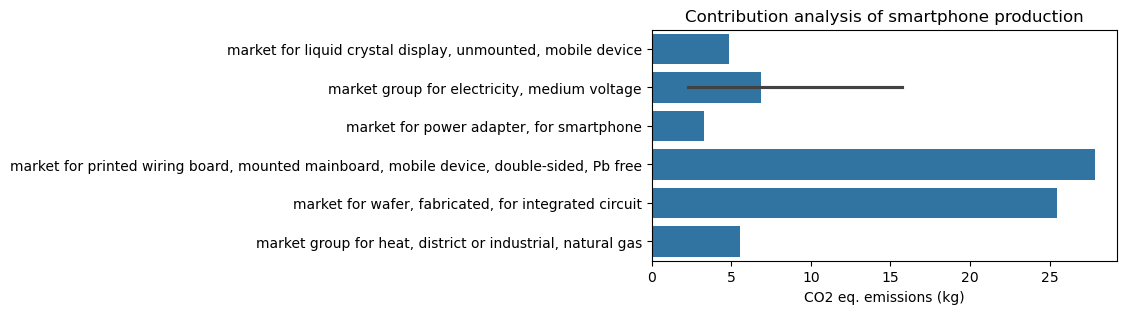

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))
sns.barplot(y='name', x='score', data=smartphone_ca_gwp, ax=ax)
ax.set(
    title='Contribution analysis of smartphone production',
    xlabel='CO2 eq. emissions (kg)',
    ylabel='')
plt.tight_layout()
plt.show()
